#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
# References: I used chat GPT to make plots and rewrite some of my comments, so they looked more "professional"

In [2]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

$PATH


In [4]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [5]:
# import wget
# url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
# download=wget.download(url)
# !mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# # If we ALL do this too often, CERN will block our IP address.... thats a bummer

In [6]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("C:/Users/rugje/Desktop/Projekt/PRA3024_2025_BiigData/ParticlePhysics_w4/LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [7]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

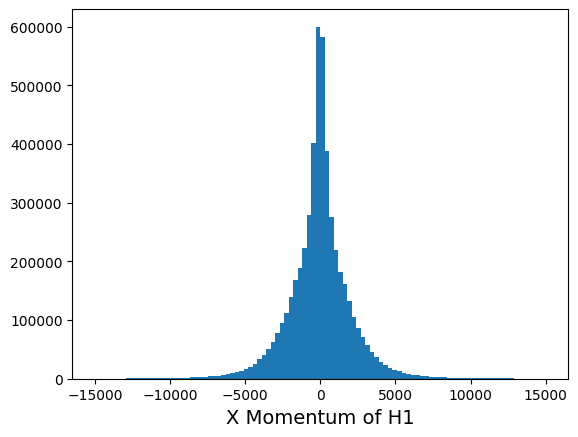

In [9]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

Text(0, 0.5, 'Counts of H1')

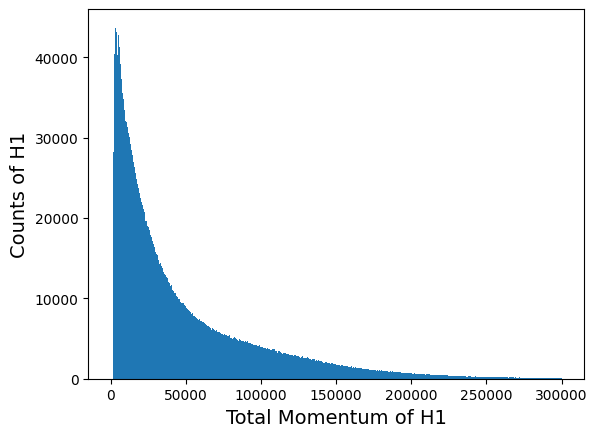

In [10]:
# Here we make a plot of the total momentum of each of the three daughters (H1, H2, H3)
# The process involves accessing the data from the DecayTree, calculating the total momentum for each daughter, and then plotting it.

# Import necessary library for calculations
import math

# Access the data from the DecayTree object
Events = f['DecayTree'] 

# Extract the momentum components (PX, PY, PZ) for the first daughter particle (H1)
H1_PX = Events['H1_PX'].array()  # Momentum component in the x direction for H1
H1_PY = Events['H1_PY'].array()  # Momentum component in the y direction for H1
H1_PZ = Events['H1_PZ'].array()  # Momentum component in the z direction for H1

# Calculate the total momentum of H1 using the relativistic momentum formula:
# P_tot = sqrt(P_X^2 + P_Y^2 + P_Z^2)
H1_Ptot = np.sqrt((H1_PX)**2 + (H1_PY)**2 + (H1_PZ)**2)

# Plot the total momentum of H1
# We create a histogram of the total momentum with 1000 bins and a range from 0 to 300,000.
plt.figure()  # Create a new figure for the plot
plt.hist(H1_Ptot, bins=1000, range=(0, 300000))  # Plot the histogram for H1's total momentum
plt.xlabel('Total Momentum of H1', fontsize=14)  # Label the x-axis
plt.ylabel('Counts of H1', fontsize=14)  # Label the y-axis


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

Text(0, 0.5, 'Counts')

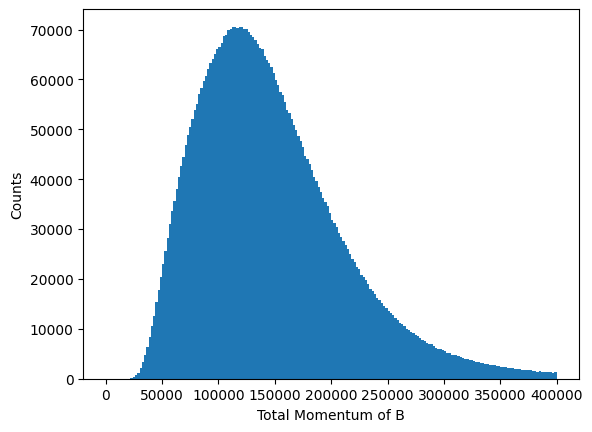

In [11]:
# Next, we need to calculate and plot the total momentum of the mother particle (B meson)
# In this case, the momentum of the mother particle (B) is calculated by summing the momenta of its decay products (H1, H2, H3).

# Extract the momentum components (PX, PY, PZ) for the three daughter particles (H1, H2, H3).
H1_PX = Events['H1_PX'].array()  # Momentum component in the x direction for H1
H1_PY = Events['H1_PY'].array()  # Momentum component in the y direction for H1
H1_PZ = Events['H1_PZ'].array()  # Momentum component in the z direction for H1

H2_PX = Events['H2_PX'].array()  # Momentum component in the x direction for H2
H2_PY = Events['H2_PY'].array()  # Momentum component in the y direction for H2
H2_PZ = Events['H2_PZ'].array()  # Momentum component in the z direction for H2
H2_Ptot = np.sqrt((H2_PX)**2 + (H2_PY)**2 + (H2_PZ)**2)  # Calculate the total momentum for H2 (for later use)

H3_PX = Events['H3_PX'].array()  # Momentum component in the x direction for H3
H3_PY = Events['H3_PY'].array()  # Momentum component in the y direction for H3
H3_PZ = Events['H3_PZ'].array()  # Momentum component in the z direction for H3
H3_Ptot = np.sqrt((H3_PX)**2 + (H3_PY)**2 + (H3_PZ)**2)  # Calculate the total momentum for H3 (for later use)

# Now, calculate the total momentum of the B meson (the mother particle)
# The momentum of the B meson is the vector sum of the momenta of its decay products (H1, H2, H3).
B_Ptot = np.sqrt(
    ((H1_PX + H2_PX + H3_PX)**2 +  # Sum of the x components of momentum
    (H1_PY + H2_PY + H3_PY)**2 +  # Sum of the y components of momentum
    (H1_PZ + H2_PZ + H3_PZ)**2)  # Sum of the z components of momentum
)

# Plot a histogram of the total momentum of the B meson
plt.figure()  # Create a new figure
plt.hist(B_Ptot, bins=200, range=(0, 400000))  # Plot the histogram with 200 bins, with momentum range from 0 to 400000
plt.xlabel('Total Momentum of B', fontsize=10)  # Label for the x-axis
plt.ylabel('Counts', fontsize=10)  # Label for the y-axis


So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
# Load the data in a slightly different way to work with it more conveniently

# Extract the data from the Events object and convert it into an array of values.
# The array will contain all the branches of the decay tree for each event.
branches = Events.arrays()

# Convert the array of branches to a Python list format (dictionary where keys are branch names and values are the data).
branches_dictionary = branches.tolist()

# Now we want to print and loop over all items in the dictionary for a specific event, say event #45
print("Event number #45")  # We will print the details of event #45
print("-------------------")  # Separator for better readability

# Loop over each branch (variable) in the dictionary corresponding to event #45
# `branches_dictionary[45]` refers to the data of the 45th event
# `items()` will give each branch's name (key) and the corresponding value
for branch, value in branches_dictionary[45].items():
    # Pretty print each branch name and its corresponding value for event #45
    print("%s  :  %s" % (branch, value))


Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [13]:
# The mass of the kaon (K) is given as 493.677 MeV/c^2
m_K = 493.677  # Kaon mass in MeV/c^2

# The energy of a particle is calculated using the relativistic energy-momentum relation:
# E = sqrt(p^2 + m^2), where p is the momentum and m is the mass of the particle.
# Here, H1_Ptot, H2_Ptot, and H3_Ptot are the total momenta of the three kaons.

# Calculate the energy of each kaon (H1, H2, H3) using its total momentum and mass
E1 = np.sqrt(H1_Ptot**2 + m_K**2)  # Energy of the first kaon
E2 = np.sqrt(H2_Ptot**2 + m_K**2)  # Energy of the second kaon
E3 = np.sqrt(H3_Ptot**2 + m_K**2)  # Energy of the third kaon

# Print the energies of the three kaons to the console. 
# Note: Setting c = 1 implies we're working in natural units, where the speed of light (c) is 1.
print(f"The energies of 3 Kaons are {E1}, {E2}, {E3} (with c=1)")





The energies of 3 Kaons are [5.18e+04, 3.26e+05, 9.08e+04, 8.69e+04, ..., 3.73e+04, 3.59e+04, 5.23e+03], [1.77e+04, 5.35e+03, 1.79e+04, 2.03e+04, ..., 6.37e+03, 7.76e+03, 2.21e+04], [1.06e+05, 8.77e+04, 8.56e+04, 1.47e+04, ..., 1.07e+04, 1.14e+05, 1.15e+05] (with c=1)


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

Text(0, 0.5, 'Counts')

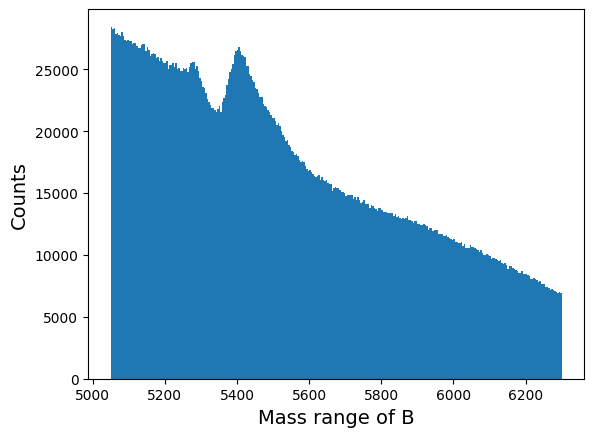

In [14]:
# Energy and momentum are conserved in particle decays, so we can calculate the energy and mass of the B meson from its daughters (H1, H2, H3)
# The total energy of the B meson is the sum of the energies of its daughters (E1, E2, E3)
E_B = E1 + E2 + E3

# Using the total energy (E_B) and the total momentum (B_Ptot), we calculate the mass of the B meson
# The mass of the B meson is derived from the energy-momentum relation: m_B = sqrt(E^2 - P^2)
m_B = np.sqrt(E_B**2 - B_Ptot**2)


# Now, let's plot a histogram of the B meson mass (m_B) to see the distribution of masses
plt.figure()
plt.hist(m_B, bins=300)  # Create a histogram with 300 bins for the mass of B meson
plt.xlabel('Mass range of B', fontsize=14)  # Label for the x-axis
plt.ylabel('Counts', fontsize=14)  # Label for the y-axis

# In theory, the mass of the B meson should lie within a specific range.
# The mass of the B meson (approximately 5.279 GeV/c^2) and check if your histogram matches this value.


We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

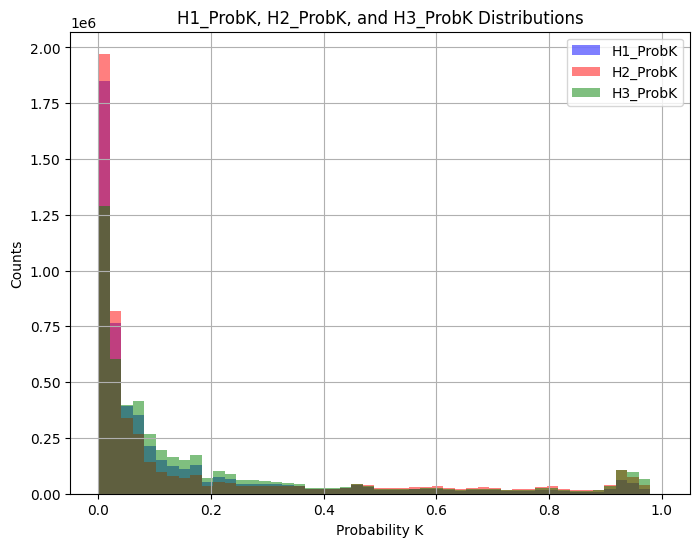

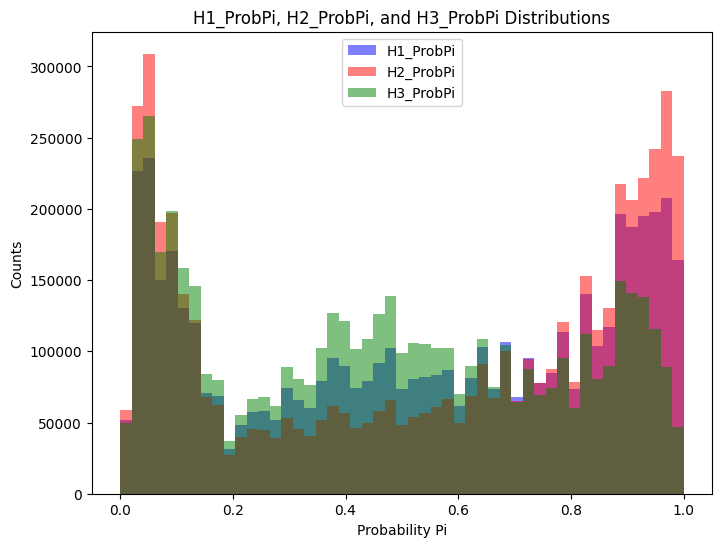

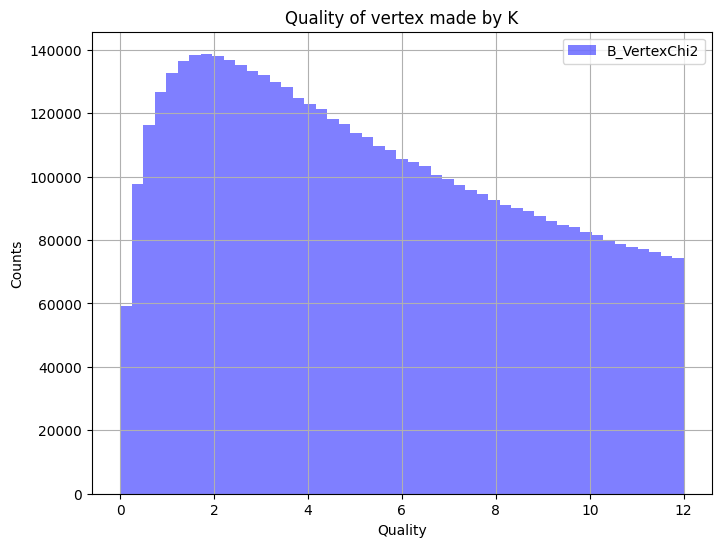

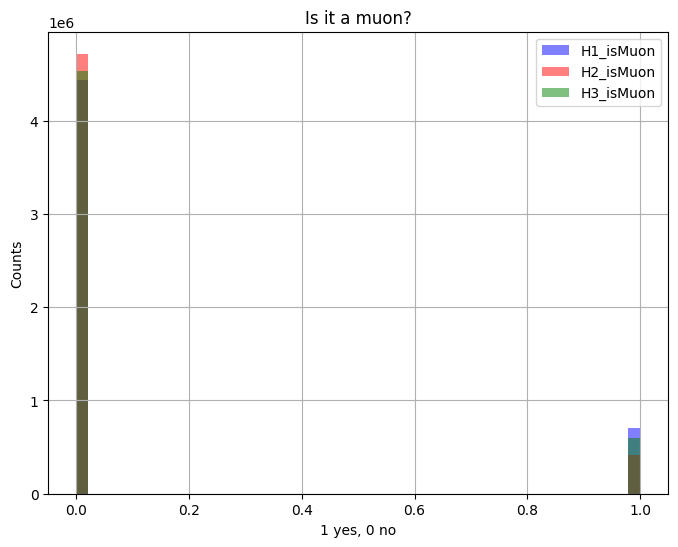

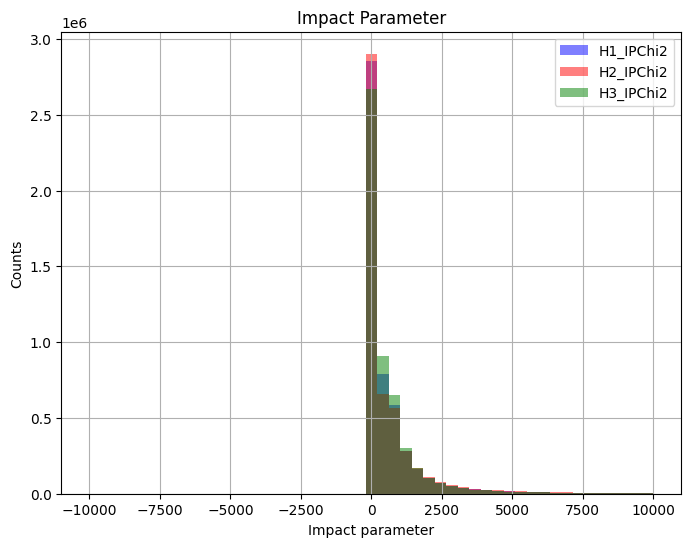

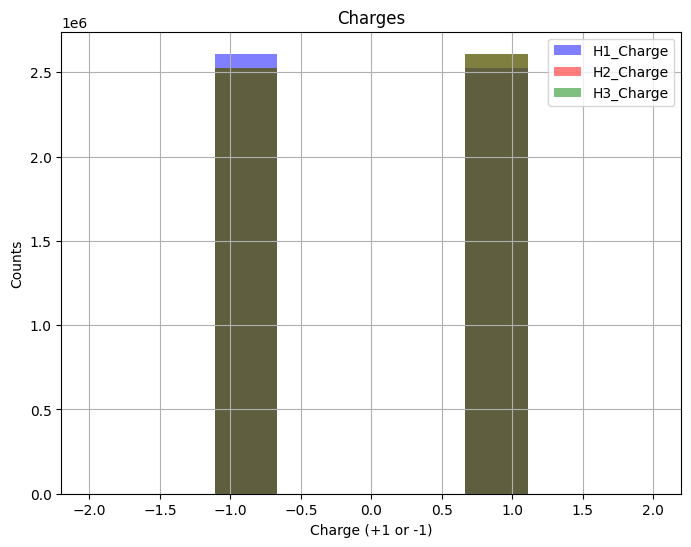

In [15]:
# Retrieve the 'ProbK' values for H1, H2, and H3 particles from the Events data
H1_ProbK = Events['H1_ProbK'].array()
H2_ProbK = Events['H2_ProbK'].array()
H3_ProbK = Events['H3_ProbK'].array()

# Retrieve the 'ProbPi' values for H1, H2, and H3 particles from the Events data
H1_ProbPi = Events['H1_ProbPi'].array()
H2_ProbPi = Events['H2_ProbPi'].array()
H3_ProbPi = Events['H3_ProbPi'].array()

# Retrieve the 'B_VertexChi2' values from the Events data (quality of vertex for K)
B_VertexChi2 = Events['B_VertexChi2'].array()

# Retrieve the 'isMuon' flags for H1, H2, and H3 particles (indicates if the particle is a muon)
H1_isMuon = Events['H1_isMuon'].array()
H2_isMuon = Events['H2_isMuon'].array()
H3_isMuon = Events['H3_isMuon'].array()

# Retrieve the 'IPChi2' values for H1, H2, and H3 particles (impact parameter significance)
H1_IPChi2 = Events['H1_IPChi2'].array()
H2_IPChi2 = Events['H2_IPChi2'].array()
H3_IPChi2 = Events['H3_IPChi2'].array()

# Retrieve the 'Charge' values for H1, H2, and H3 particles (charge of the particles)
H1_Charge = Events['H1_Charge'].array()
H2_Charge = Events['H2_Charge'].array()
H3_Charge = Events['H3_Charge'].array()

# Define bins for histograms (assuming probabilities range from 0 to 1)
bins = np.linspace(0, 1, 50)

# Plot histograms for H1_ProbK, H2_ProbK, and H3_ProbK values
plt.figure(figsize=(8, 6))
plt.hist(H1_ProbK, bins=bins, alpha=0.5, label="H1_ProbK", color="blue")
plt.hist(H2_ProbK, bins=bins, alpha=0.5, label="H2_ProbK", color="red")
plt.hist(H3_ProbK, bins=bins, alpha=0.5, label="H3_ProbK", color="green")
plt.xlabel("Probability K")
plt.ylabel("Counts")
plt.title("H1_ProbK, H2_ProbK, and H3_ProbK Distributions")
plt.legend()
plt.grid(True)

# Plot histograms for H1_ProbPi, H2_ProbPi, and H3_ProbPi values
plt.figure(figsize=(8, 6))
plt.hist(H1_ProbPi, bins=bins, alpha=0.5, label="H1_ProbPi", color="blue")
plt.hist(H2_ProbPi, bins=bins, alpha=0.5, label="H2_ProbPi", color="red")
plt.hist(H3_ProbPi, bins=bins, alpha=0.5, label="H3_ProbPi", color="green")
plt.xlabel("Probability Pi")
plt.ylabel("Counts")
plt.title("H1_ProbPi, H2_ProbPi, and H3_ProbPi Distributions")
plt.legend()

# Define bins for B_VertexChi2 histogram (adjusted range)
bins1 = np.linspace(0, 12)

# Plot histogram for B_VertexChi2 values (quality of vertex)
plt.figure(figsize=(8, 6))
plt.hist(B_VertexChi2, bins=bins1, alpha=0.5, label="B_VertexChi2", color="blue")
plt.xlabel("Quality")
plt.ylabel("Counts")
plt.title("Quality of vertex made by K")
plt.legend()
plt.grid(True)

# Plot histograms for H1_isMuon, H2_isMuon, and H3_isMuon values (muon identification)
plt.figure(figsize=(8, 6))
plt.hist(H1_isMuon, bins=bins, alpha=0.5, label="H1_isMuon", color="blue")
plt.hist(H2_isMuon, bins=bins, alpha=0.5, label="H2_isMuon", color="red")
plt.hist(H3_isMuon, bins=bins, alpha=0.5, label="H3_isMuon", color="green")
plt.xlabel("1 yes, 0 no")
plt.ylabel("Counts")
plt.title("Is it a muon?")
plt.legend()
plt.grid(True)

# Define bins for IPChi2 histogram (impact parameter significance)
bins2 = np.linspace(-10000, 10000, 50)

# Plot histograms for H1_IPChi2, H2_IPChi2, and H3_IPChi2 values (impact parameter)
plt.figure(figsize=(8, 6))
plt.hist(H1_IPChi2, bins=bins2, alpha=0.5, label="H1_IPChi2", color="blue")
plt.hist(H2_IPChi2, bins=bins2, alpha=0.5, label="H2_IPChi2", color="red")
plt.hist(H3_IPChi2, bins=bins2, alpha=0.5, label="H3_IPChi2", color="green")
plt.xlabel("Impact parameter")
plt.ylabel("Counts")
plt.title("Impact Parameter")
plt.legend()
plt.grid(True)

# Define bins for Charge histogram (charge of particles)
bins3 = np.linspace(-2, 2, 10)

# Plot histograms for H1_Charge, H2_Charge, and H3_Charge values (charge of particles)
plt.figure(figsize=(8, 6))
plt.hist(H1_Charge, bins=bins3, alpha=0.5, label="H1_Charge", color="blue")
plt.hist(H2_Charge, bins=bins3, alpha=0.5, label="H2_Charge", color="red")
plt.hist(H3_Charge, bins=bins3, alpha=0.5, label="H3_Charge", color="green")
plt.xlabel("Charge (+1 or -1)")
plt.ylabel("Counts")
plt.title("Charges")
plt.legend()
plt.grid(True)


Using these plots, we can now think about making a preselection. This has some format like the below:

In [16]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, 
# H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)
selection = (
    (branches['H1_ProbPi'] < 0.6) & #Being pion
    (branches['H2_ProbPi'] < 0.6) &
    (branches['H3_ProbPi'] < 0.6) &
    (branches['H1_ProbK'] > 0.1) & #Being kaon 
    (branches['H2_ProbK'] > 0.1) &
    (branches['H3_ProbK'] > 0.1) &
    (branches['B_VertexChi2'] < 6) & 
    (branches['H1_isMuon'] == 0) & # Being Muon
    (branches['H2_isMuon'] == 0) &
    (branches['H3_isMuon'] == 0)
)


The total number of events that satisfy cuts is 54819


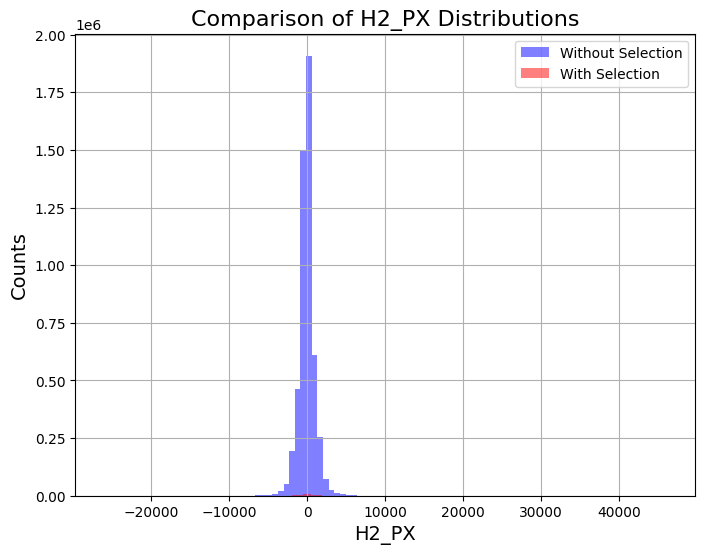

In [17]:
#To apply the selection - we can use the selection command after our instruction:
Cut_H2_PX = branches['H2_PX'][selection]


# Here we apply cuts to the events and print the number after the cuts
CutTree=branches[selection]
print(f'The total number of events that satisfy cuts is {len(CutTree)}')

# So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree
# Plots of the H2_PX
plt.figure(figsize=(8, 6))
plt.hist(H2_PX, bins=100, alpha=0.5, label="Without Selection", color="blue")
plt.hist(Cut_H2_PX, bins=100, alpha=0.5, label="With Selection", color="red")
plt.xlabel('H2_PX', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Comparison of H2_PX Distributions', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# As we can see (below, for H2_PX), most of the events was excluded

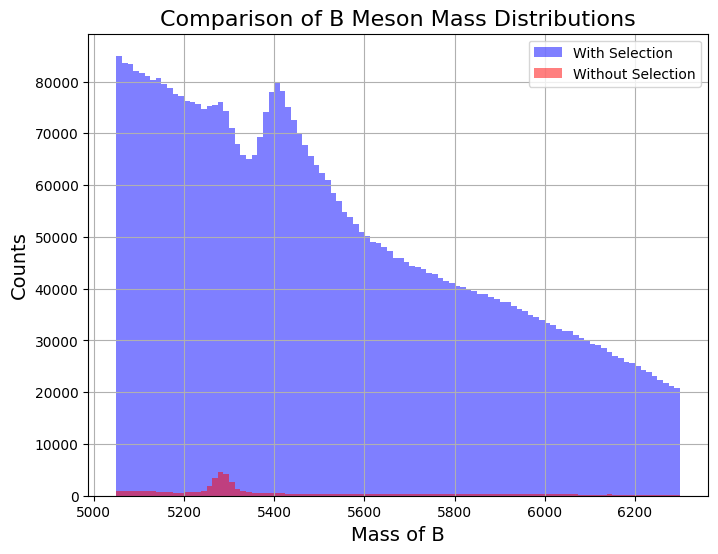

Total B mesons before cuts: 5135823
Total B mesons after cuts: 54819


In [18]:
# Now as a good check, we should see the effect of applying our cuts.
# We compare the B meson mass distribution before and after applying selection criteria.

# Extract B meson mass values after selection (post-cut data)
cut_m_B = m_B[selection]

# Create a histogram comparing pre-cut and post-cut distributions
plt.figure(figsize=(8, 6))

# Histogram of B meson mass **after applying selection cuts**
plt.hist(m_B, bins=100, alpha=0.5, label="With Selection", color="blue")

# Histogram of B meson mass **before applying selection cuts**
plt.hist(cut_m_B, bins=100, alpha=0.5, label="Without Selection", color="red")

# Set axis labels and title, enable grid for better visualization etc.
plt.xlabel('Mass of B', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Comparison of B Meson Mass Distributions', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# What do you notice about your histogram now? 
# ------ The shape and peak change, the total number of events decreases

# Print the number of entries before and after applying the selection criteria
print(f"Total B mesons before cuts: {len(m_B)}")
print(f"Total B mesons after cuts: {len(cut_m_B)}")


# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

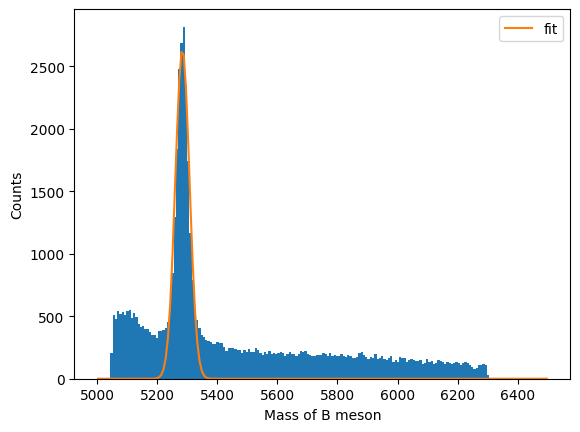

In [19]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
B_Mass = cut_m_B

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edges, _= plt.hist(B_Mass, bins=200, range=(5000, 6500))


bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = bin_centers
y_data = bin_height


# Create a Gauss function for fitting - nothing needs changing here
def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Get the fitted curve - some things need changing here
guess = [max(y_data), np.mean(x_data), np.std(x_data)]
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=guess)


# note you need to pick some initial parameters in p0= above!

y_fit = gauss(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well

plt.plot(x_data, y_fit, label='fit')
plt.xlabel("Mass of B meson", fontsize=10)
plt.ylabel("Counts", fontsize=10)
plt.legend()
plt.show()

# we can see that the fit is not perfect. Therefore, we are going to try out an exponential one

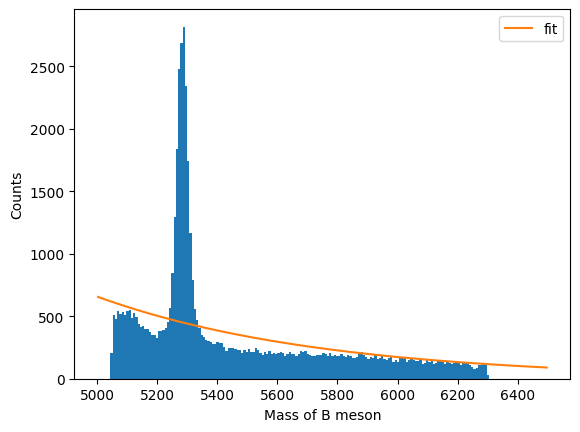

In [20]:
# Explore optimisedParameters - what does it contain? 
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...


bin_height, bin_edge, _=plt.hist(cut_m_B, bins=200, range=(5000,6500))

bin_centers = (bin_edge[1:] + bin_edge[:-1])/2
x_data = bin_centers
y_data = bin_height

def exponential(x, A_exp, B):
    return A_exp * np.exp(B * x)
p0 = [max(y_data)*0.1, -0.00005]
optimisedParameters, pcov = curve_fit(exponential, x_data, y_data, p0)

yfit = exponential(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well

plt.plot(x_data, yfit, label='fit');
plt.xlabel("Mass of B meson", fontsize=10)
plt.ylabel("Counts", fontsize=10)
plt.legend()
plt.legend()
plt.show()

# we see that the exponential fit is quite okay for the background signal, but the Gauss one was better for the peak (yielded signal). 
# We want to combine them

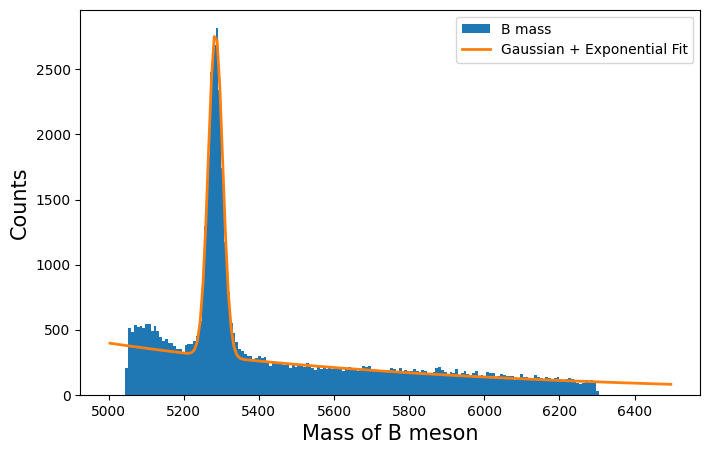

In [21]:
import scipy.stats as stats

# Define a combined function: Gaussian + Exponential background
def gauss_exp(x, A, mu, sigma, A_exp, B):
    gaussian = A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    exponential = A_exp * np.exp(B * x)
    return gaussian + exponential

# Initial parameter guesses (improve if needed)
p0 = [max(y_data), np.mean(x_data), np.std(x_data), max(y_data) * 0.1, -0.00005]

# Fit the function to data
optimisedParameters, pcov = curve_fit(gauss_exp, x_data, y_data, p0=p0, maxfev=10000)

# Generate fitted curve
y_fit = gauss_exp(x_data, *optimisedParameters)

# Plot data and fit
plt.figure(figsize=(8, 5))
plt.hist(cut_m_B, bins=200, range=(5000, 6500), label="B mass")  # Histogram of data
plt.plot(x_data, y_fit, label="Gaussian + Exponential Fit", linewidth=2)

# Labels and legend
plt.xlabel("Mass of B meson", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.legend()
plt.show()

# It looks neet now. Maybe not perfect, but that is how life works.


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [22]:
# Here we want to find the area under the curve - number of events under the peak and background with standard error analysis. 

# Extract optimized parameters and their errors
A, mu, sigma, A_exp, B = optimisedParameters
errors = np.sqrt(np.diag(pcov))  # Standard errors from covariance matrix
A_err, mu_err, sigma_err, A_exp_err, B_err = errors

# Compute the number of events (integral) for signal and background
signal_yield = ((A * np.sqrt(2 * np.pi) * sigma)/(max(x_data)-min(x_data))*200) #cut data

# Background is just the total number of events - the events under the peak :)
Tot_events = len(cut_m_B)
background_yield = Tot_events - signal_yield

# Compute errors on yields using error propagation
signal_yield_err = np.sqrt((sigma_err/sigma) ** 2 + (A_err/A) ** 2) * signal_yield
background_yield_err = np.sqrt((sigma_err/sigma) ** 2 + (A_err/A) ** 2) * background_yield

# Print the results
print(f"Signal Yield: {signal_yield:.2f} ± {signal_yield_err:.2f} events")
print(f"Background Yield: {background_yield:.2f} ± {background_yield_err:.2f} events")

# We check whether they add up to the total number of events, and they do. The errors are quite big, but it is what it is.

Signal Yield: 16015.55 ± 519.01 events
Background Yield: 38803.45 ± 1257.50 events


# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

The number of B+ after the cut is 28314
The number of B- after the cut is 26505
Signal Yield for B+: 8475.35 ± 266.27 events
Background Yield for B+: 19838.65 ± 623.26 events
Signal Yield for B-: 7522.87 ± 252.57 events
Background Yield for B-: 18982.13 ± 637.30 events


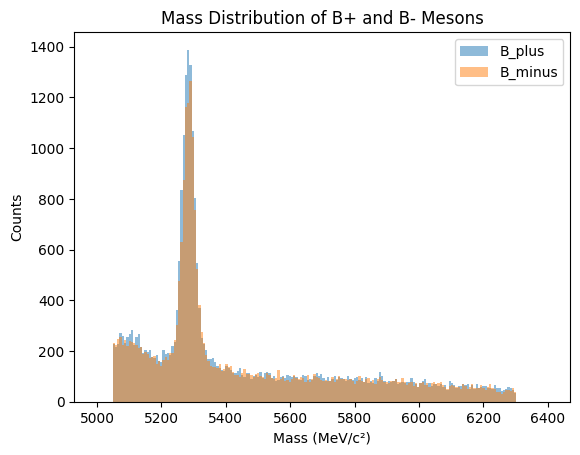

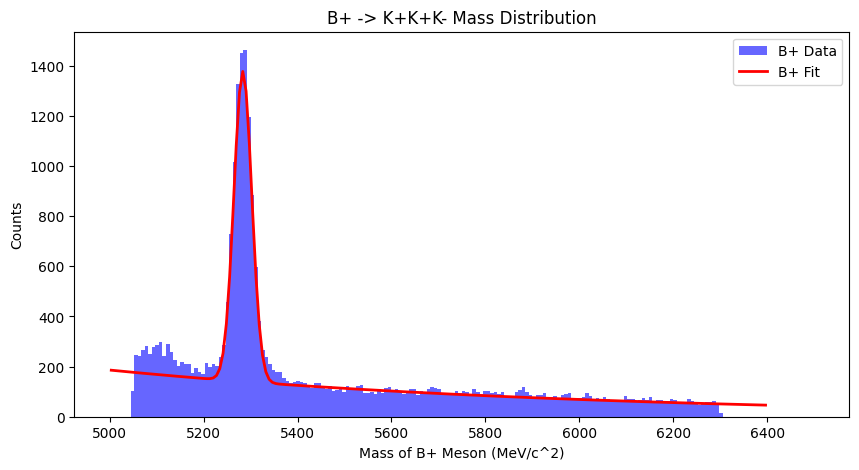

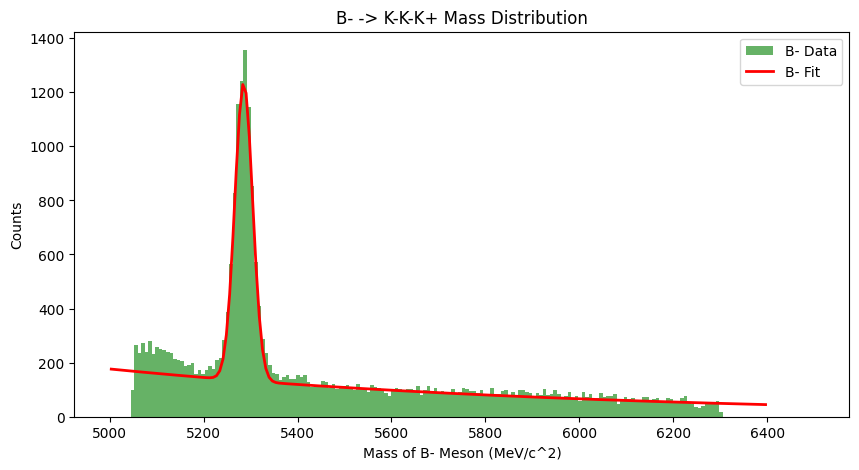

In [ ]:
# To find yielded signal for the B+ and B- we are going to apply new selection criteria and repeat the steps for finding the B meson, 
# now with B+ and B- seperately.

# Separate selections for B+ and B- candidates based on charge sum
selection_plus = selection & (branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] == 1)
selection_minus = selection & (branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge'] == -1)

# Extract B+ and B- mass distributions after selection
num_B_plus = m_B[selection_plus]
num_B_minus = m_B[selection_minus]

# Print the number of events after selection
print(f'The number of B+ after the cut is {len(num_B_plus)}')
print(f'The number of B- after the cut is {len(num_B_minus)}')

# Plot histograms and extract bin data
bin_height_plus, bin_edges_plus, _ = plt.hist(num_B_plus, bins=200, alpha=0.5, range=(5000, 6400), label="B_plus")
bin_height_minus, bin_edges_minus, _ = plt.hist(num_B_minus, bins=200, alpha=0.5, range=(5000, 6400), label="B_minus")
plt.xlabel("Mass (MeV/c²)")  
plt.ylabel("Counts") 
plt.title("Mass Distribution of B+ and B- Mesons") 
plt.legend() 



bin_centers_plus = (bin_edges_plus[:-1] + bin_edges_plus[1:]) / 2
bin_centers_minus = (bin_edges_minus[:-1] + bin_edges_minus[1:]) / 2

x_data_plus, y_data_plus = bin_centers_plus, bin_height_plus
x_data_minus, y_data_minus = bin_centers_minus, bin_height_minus

# Initial parameter guesses for fitting
guess_plus = [max(y_data_plus), np.mean(x_data_plus), np.std(x_data_plus), max(y_data_plus) * 0.12, -0.000005]
guess_minus = [max(y_data_minus), np.mean(x_data_minus), np.std(x_data_minus), max(y_data_minus) * 0.12, -0.000005]

# Fit the function to data
optimisedParameters_plus, pcovP = curve_fit(gauss_exp, x_data_plus, y_data_plus, guess_plus, maxfev=10000)
optimisedParameters_minus, pcovM = curve_fit(gauss_exp, x_data_minus, y_data_minus, guess_minus, maxfev=10000)

# Generate fitted curves
y_fit_plus = gauss_exp(x_data_plus, *optimisedParameters_plus)
y_fit_minus = gauss_exp(x_data_minus, *optimisedParameters_minus)

# Extract optimized parameters and errors
A_plus, mu_plus, sigma_plus, A_exp_plus, P_plus = optimisedParameters_plus
A_minus, mu_minus, sigma_minus, A_exp_minus, P_minus = optimisedParameters_minus

errors_plus = np.sqrt(np.diag(pcovP))
errors_minus = np.sqrt(np.diag(pcovM))

A_err_plus, mu_err_plus, sigma_err_plus, A_exp_err_plus, P_err_plus = errors_plus
A_err_minus, mu_err_minus, sigma_err_minus, A_exp_err_minus, P_err_minus = errors_minus

# Compute signal yields using fitted parameters
signal_yield_plus = (A_plus * np.sqrt(2 * np.pi) * sigma_plus) / (max(x_data_plus) - min(x_data_plus)) * 200
signal_yield_minus = (A_minus * np.sqrt(2 * np.pi) * sigma_minus) / (max(x_data_minus) - min(x_data_minus)) * 200

# Compute background yields
Tot_plus, Tot_minus = len(num_B_plus), len(num_B_minus)
background_yield_plus = Tot_plus - signal_yield_plus
background_yield_minus = Tot_minus - signal_yield_minus

# Compute errors using error propagation
signal_yield_err_plus = np.sqrt((sigma_err_plus / sigma_plus) ** 2 + (A_err_plus / A_plus) ** 2) * signal_yield_plus
signal_yield_err_minus = np.sqrt((sigma_err_minus / sigma_minus) ** 2 + (A_err_minus / A_minus) ** 2) * signal_yield_minus

background_yield_err_plus = np.sqrt((sigma_err_plus / sigma_plus) ** 2 + (A_err_plus / A_plus) ** 2) * background_yield_plus
background_yield_err_minus = np.sqrt((sigma_err_minus / sigma_minus) ** 2 + (A_err_minus / A_minus) ** 2) * background_yield_minus

# Print results
print(f"Signal Yield for B+: {signal_yield_plus:.2f} ± {signal_yield_err_plus:.2f} events")
print(f"Background Yield for B+: {background_yield_plus:.2f} ± {background_yield_err_plus:.2f} events")
print(f"Signal Yield for B-: {signal_yield_minus:.2f} ± {signal_yield_err_minus:.2f} events")
print(f"Background Yield for B-: {background_yield_minus:.2f} ± {background_yield_err_minus:.2f} events")

# Plot B+ histogram and fit
plt.figure(figsize=(10, 5))
plt.hist(num_B_plus, bins=200, range=(5000, 6500), alpha=0.6, label="B+ Data", color="blue")
plt.plot(bin_centers_plus, y_fit_plus, label="B+ Fit", color="red", linewidth=2)
plt.xlabel("Mass of B+ Meson (MeV/c^2)")
plt.ylabel("Counts")
plt.legend()
plt.title("B+ -> K+K+K- Mass Distribution")
plt.show()

# Plot B- histogram and fit
plt.figure(figsize=(10, 5))
plt.hist(num_B_minus, bins=200, range=(5000, 6500), alpha=0.6, label="B- Data", color="green")
plt.plot(bin_centers_minus, y_fit_minus, label="B- Fit", color="red", linewidth=2)
plt.xlabel("Mass of B- Meson (MeV/c^2)")
plt.ylabel("Counts")
plt.legend()
plt.title("B- -> K-K-K+ Mass Distribution")
plt.show()


In [24]:
# we see that the number of B+ and B- is different, however, does it solve the "matter antimatter assymetry" ? Well, we check the assymetry and its 
# uncertainty. 
# Calculate Asymmetry
A_value = (signal_yield_minus - signal_yield_plus) / (signal_yield_minus + signal_yield_plus)

# Calculate Uncertainty
sigma_A = np.sqrt((1 - A_value**2) / (signal_yield_minus + signal_yield_plus))

# Print Results
print(f"Asymmetry (A) = {A_value:.4f}")
print(f"Uncertainty (σ_A) = {sigma_A:.4f}")

# We see that it is very small (B+ occurance is a little bit greater than B-). However, this value is too low to solve this problem.


Asymmetry (A) = -0.0595
Uncertainty (σ_A) = 0.0079


# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [25]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [26]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [27]:
#Make the revised Dalitz plot here for only B+ mesons

In [28]:
#Make the revised Dalitz plot here for only B- mesons

In [29]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)